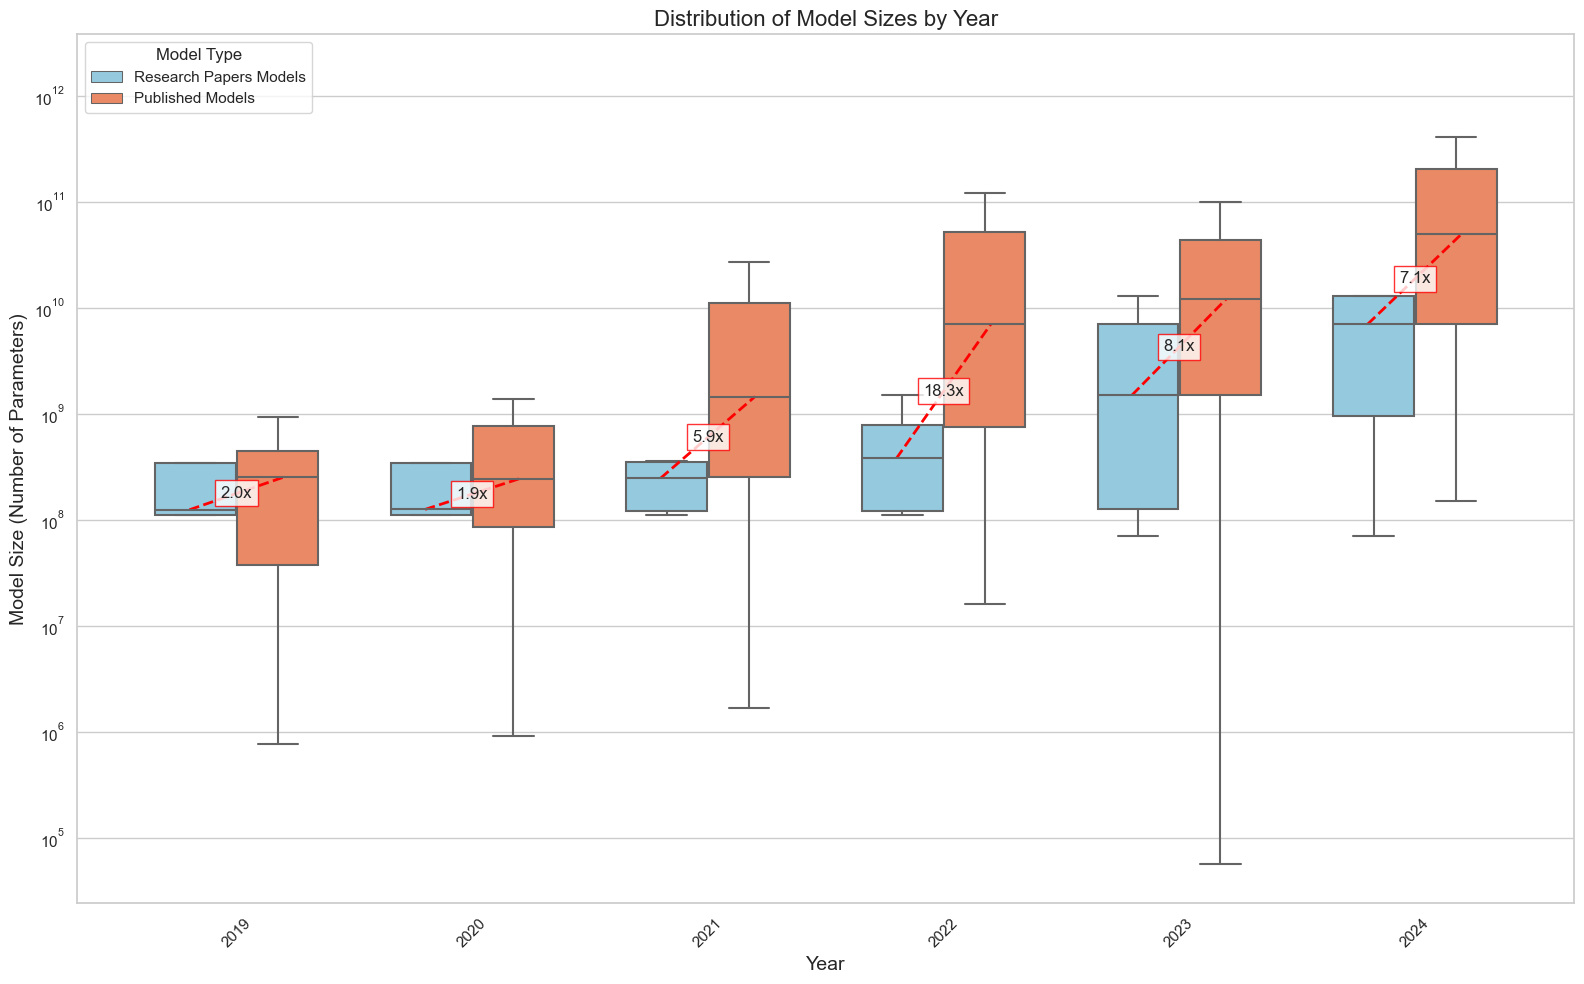

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files into DataFrames
df_research = pd.read_csv('transformers_only.csv')
df_published = pd.read_csv('Epoch Database - Notable Systems.csv')

# Ensure the 'year' and 'param count' columns are correctly typed for the research DataFrame
df_research['year'] = df_research['year'].astype(int)
df_research['param count'] = df_research['param count'].astype(float)
df_research['Type'] = 'Research Papers Models'

# Filter the published DataFrame to include only models from 2019 to 2024
df_published['Publication date'] = pd.to_datetime(df_published['Publication date'])
df_published = df_published[(df_published['Publication date'].dt.year >= 2019) & 
                            (df_published['Publication date'].dt.year <= 2024)]
df_published['year'] = df_published['Publication date'].dt.year
df_published['param count'] = df_published['Parameters'].astype(float)
df_published['Type'] = 'Published Models'
# Combine both DataFrames

df_combined = pd.concat([df_research[['year', 'param count', 'Type']], 
                         df_published[['year', 'param count', 'Type']]])

# Ensure years are treated as categorical and sorted
df_combined['year'] = pd.Categorical(df_combined['year'], categories=sorted(df_combined['year'].unique()), ordered=True)

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the box plot
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='year', y='param count', hue='Type', data=df_combined,
                 palette={'Research Papers Models': 'skyblue', 'Published Models': 'coral'},
                 width=0.7, fliersize=0)

# Set the Y-axis to a logarithmic scale
ax.set_yscale('log')

# Add titles and labels
ax.set_title('Distribution of Model Sizes by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Model Size (Number of Parameters)', fontsize=14)

# Calculate and plot median values
years = sorted(df_combined['year'].unique())
for i, year in enumerate(years):
    research_median = df_combined[(df_combined['year'] == year) & (df_combined['Type'] == 'Research Papers Models')]['param count'].median()
    published_median = df_combined[(df_combined['year'] == year) & (df_combined['Type'] == 'Published Models')]['param count'].median()
    
    if not np.isnan(research_median) and not np.isnan(published_median):
        x1, x2 = i - 0.2, i + 0.2
        y1, y2 = research_median, published_median
        plt.plot([x1, x2], [y1, y2], color='red', linestyle='--', linewidth=2)
        gap_ratio = max(y1, y2) / min(y1, y2)
        plt.text(i, np.sqrt(y1 * y2), f'{gap_ratio:.1f}x', 
                 horizontalalignment='center', verticalalignment='center',
                 bbox=dict(facecolor='white', edgecolor='red', alpha=0.8))

# Adjust legend
plt.legend(title='Model Type', loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

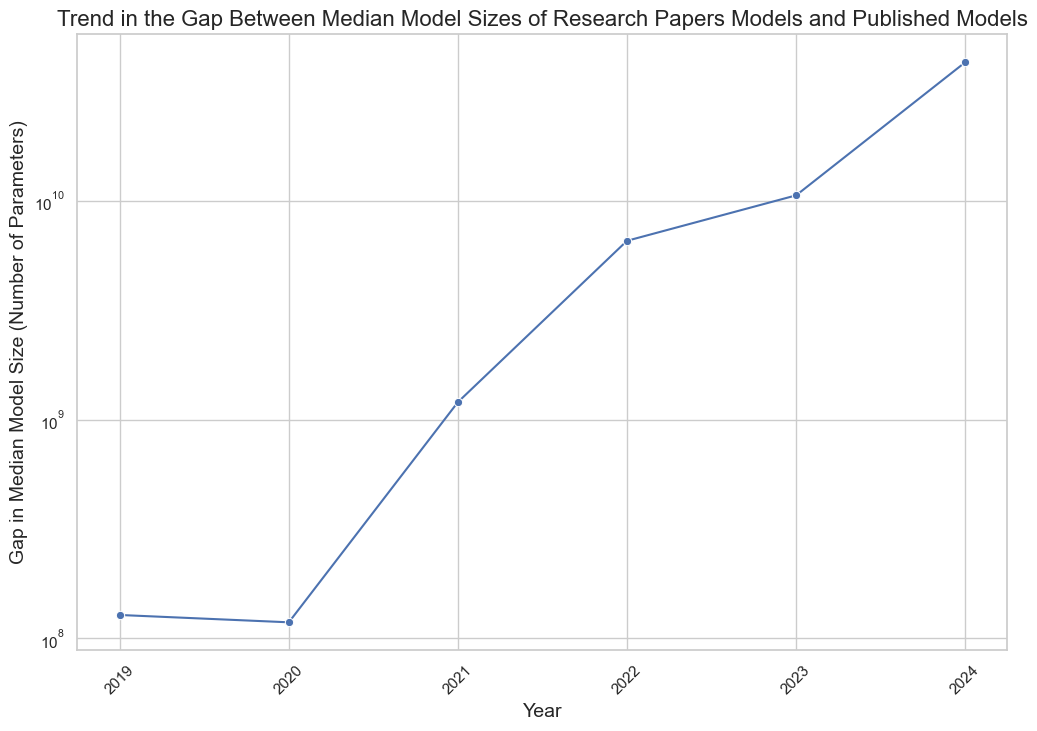

In [31]:
# Combine both DataFrames
df_combined = pd.concat([df_research[['year', 'param count', 'Type']], 
                         df_published[['year', 'param count', 'Type']]])

# Calculate the median model size for each year and type
median_sizes = df_combined.groupby(['year', 'Type'])['param count'].median().reset_index()

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
median_pivot = median_sizes.pivot(index='year', columns='Type', values='param count')

# Calculate the gap between the median sizes
median_pivot['Gap'] =  median_pivot['Published Models'] - median_pivot['Research Papers Models']

# Plot the trend in the gap
plt.figure(figsize=(12, 8))

sns.lineplot(data=median_pivot, x=median_pivot.index, y='Gap', marker='o')

# Set y-axis to log scale
plt.yscale('log')

# Add titles and labels
plt.title('Trend in the Gap Between Median Model Sizes of Research Papers Models and Published Models', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gap in Median Model Size (Number of Parameters)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

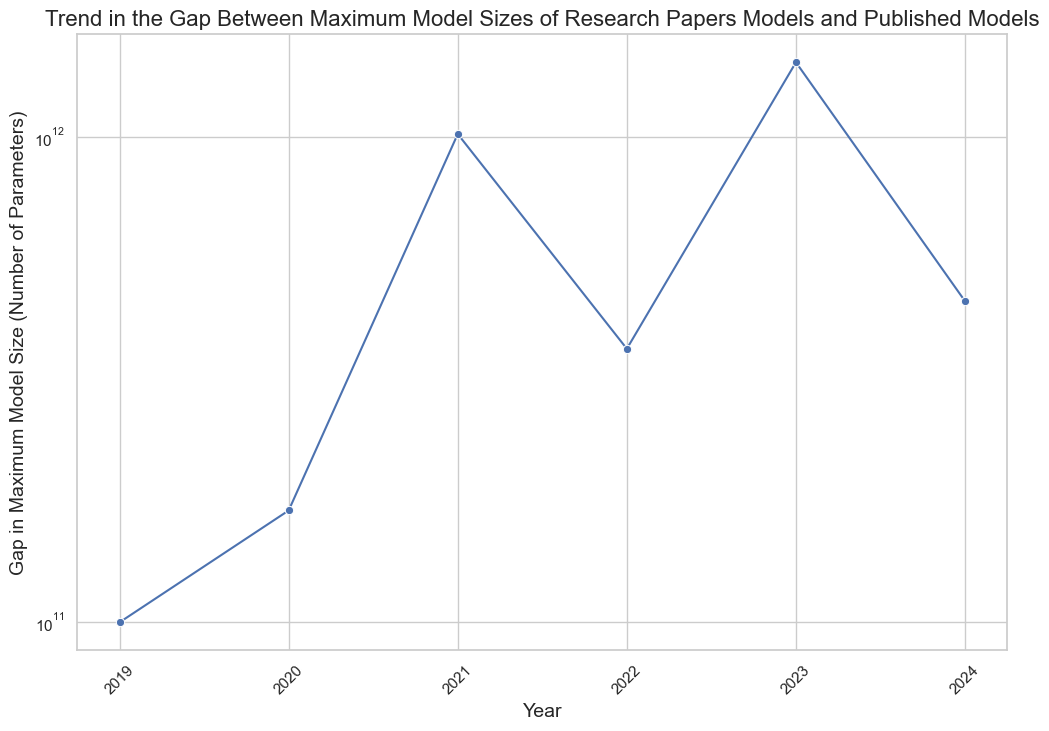

In [32]:

# Calculate the maximum model size for each year and type
max_sizes = df_combined.groupby(['year', 'Type'])['param count'].max().reset_index()

# Pivot the DataFrame to have 'year' as the index and 'Type' as columns
max_pivot = max_sizes.pivot(index='year', columns='Type', values='param count')

# Calculate the gap between the maximum sizes
max_pivot['Gap'] =  max_pivot['Published Models'] - max_pivot['Research Papers Models']

# Plot the trend in the gap for maximum sizes
plt.figure(figsize=(12, 8))
sns.lineplot(data=max_pivot, x=max_pivot.index, y='Gap', marker='o')

# Set y-axis to log scale
plt.yscale('log')

# Add titles and labels
plt.title('Trend in the Gap Between Maximum Model Sizes of Research Papers Models and Published Models', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gap in Maximum Model Size (Number of Parameters)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()